# Лабораторная работа 2

Выполнил: Кузьмин Роман, ИУ5-25М

Датасет: [Steam Store Data](https://www.kaggle.com/datasets/amanbarthwal/steam-store-data?select=steam-games.csv)

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="ticks")
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('steam-games.csv', sep=",")

In [3]:
data.isnull().sum()

app_id                      0
title                       0
release_date               57
genres                     87
categories                 45
developer                 190
publisher                 211
original_price          37638
discount_percentage     37638
discounted_price          240
dlc_available               0
age_rating                  0
content_descriptor      40122
about_description         138
win_support                 0
mac_support                 0
linux_support               0
awards                      0
overall_review           2477
overall_review_%         2477
overall_review_count     2477
recent_review           36994
recent_review_%         36994
recent_review_count     36994
dtype: int64

In [4]:
data.shape

(42497, 24)

In [5]:
data.head()

,app_id,title,release_date,genres,categories,developer,publisher,original_price,discount_percentage,discounted_price,...,win_support,mac_support,linux_support,awards,overall_review,overall_review_%,overall_review_count,recent_review,recent_review_%,recent_review_count
0,730,Counter-Strike 2,"21 Aug, 2012","Action, Free to Play","Cross-Platform Multiplayer, Steam Trading Card...",Valve,Valve,NaN,NaN,Free,...,True,False,True,1,Very Positive,87.0,8062218.0,Mostly Positive,79.0,57466.0
1,570,Dota 2,"9 Jul, 2013","Action, Strategy, Free to Play","Steam Trading Cards, Steam Workshop, SteamVR C...",Valve,Valve,NaN,NaN,Free,...,True,True,True,0,Very Positive,81.0,2243112.0,Mostly Positive,72.0,23395.0
2,2215430,Ghost of Tsushima DIRECTOR'S CUT,"16 May, 2024","Action, Adventure","Single-player, Online Co-op, Steam Achievement...",Sucker Punch Productions,PlayStation PC LLC,NaN,NaN,"₹3,999.00",...,True,False,False,0,Very Positive,89.0,12294.0,NaN,NaN,NaN
3,1245620,ELDEN RING,"24 Feb, 2022","Action, RPG","Single-player, Online PvP, Online Co-op, Steam...",FromSoftware Inc.,FromSoftware Inc.,NaN,NaN,"₹3,599.00",...,True,False,False,6,Very Positive,93.0,605191.0,Very Positive,94.0,7837.0
4,1085660,Destiny 2,"1 Oct, 2019","Action, Adventure, Free to Play","Single-player, Online PvP, Online Co-op, Steam...",Bungie,Bungie,NaN,NaN,Free,...,True,False,False,0,Very Positive,80.0,594713.0,Mostly Positive,73.0,4845.0


Пропуски в данных в столбцах c небольшим количеством пропусков можно обработать удалением - это единичные значения (по сравнению с размером датасета).

In [6]:
colsForDel = ['release_date', 'genres', 'categories', 'developer',
              'publisher', 'discounted_price', 'about_description']
data_drop_na = data[colsForDel].dropna()
data_drop_na.shape

(41975, 7)

In [7]:
def plot_hist_diff(old_ds, new_ds, cols):
    """
    Разница между распределениями до и после устранения пропусков
    """
    for c in cols:
        fig, ax = plt.subplots(figsize=(10,10))
        ax.title.set_text('Поле - ' + str(c))
        old_ds[c].hist(bins=50, ax=ax, density=True, color='green')
        new_ds[c].hist(bins=50, ax=ax, color='blue', density=True, alpha=0.5)
        plt.show()

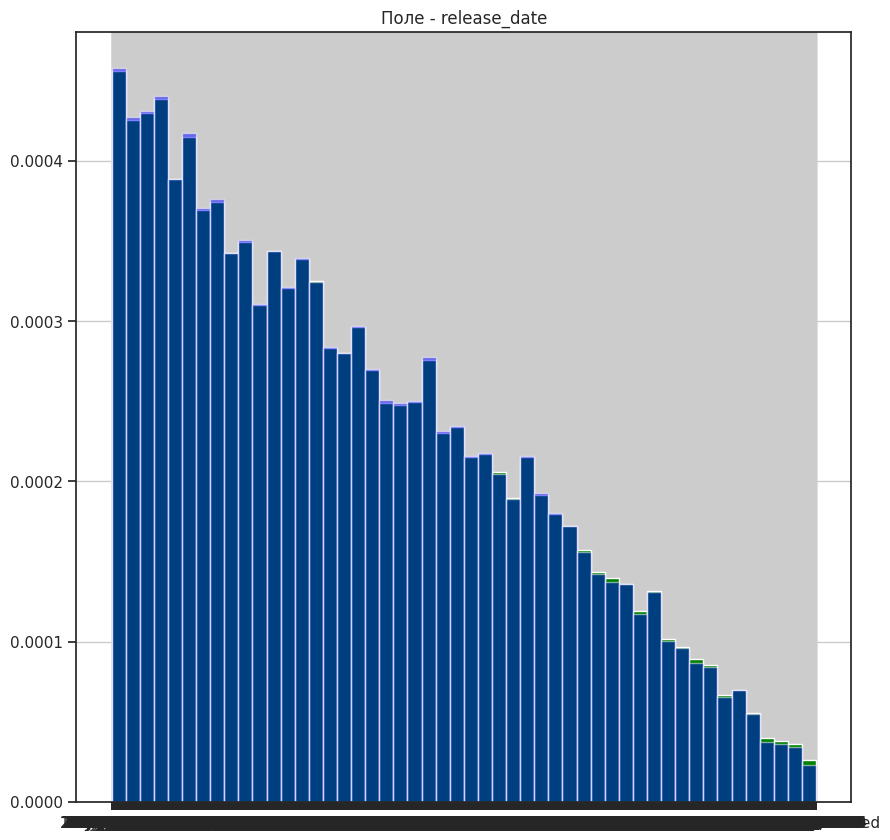

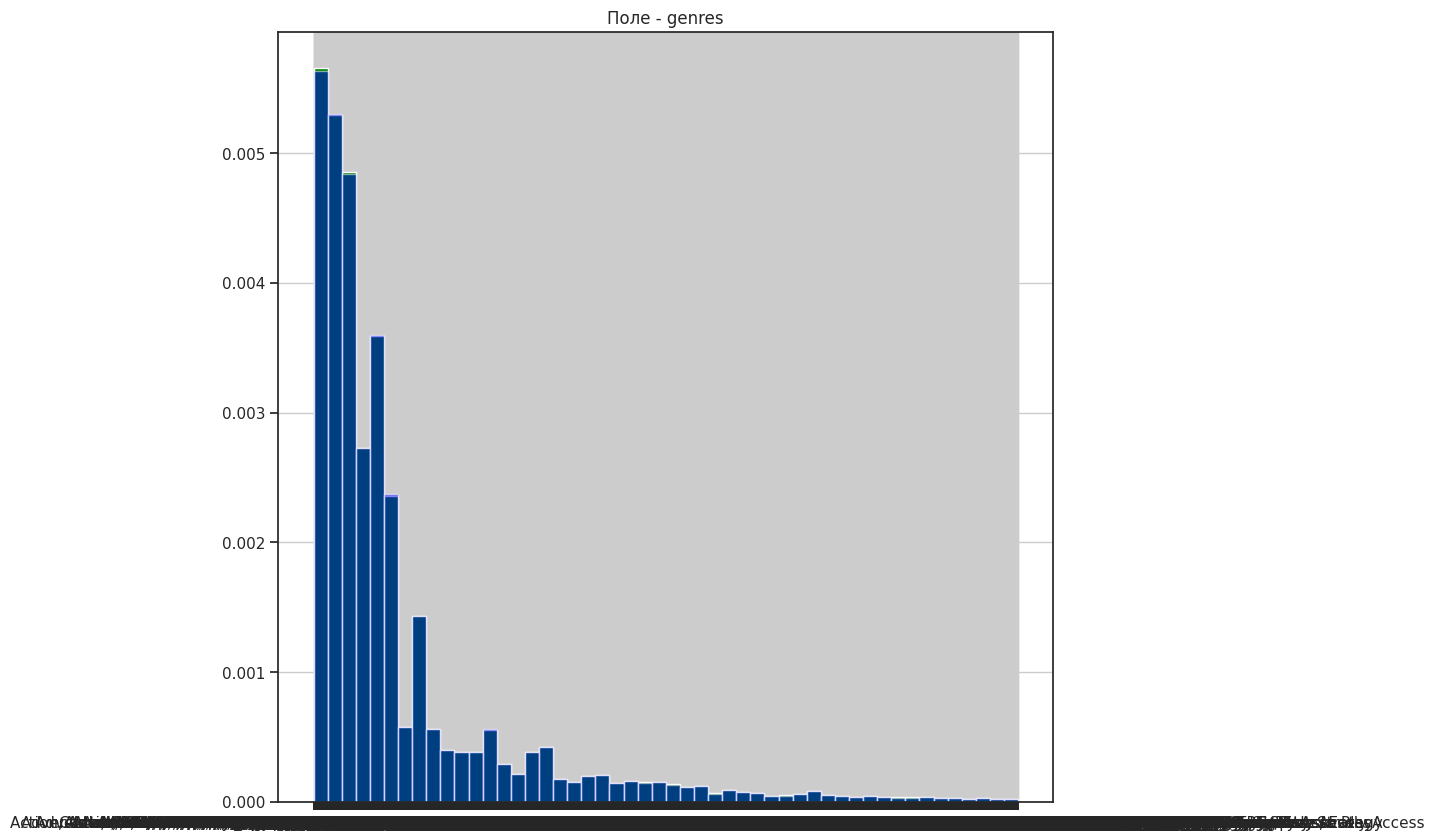

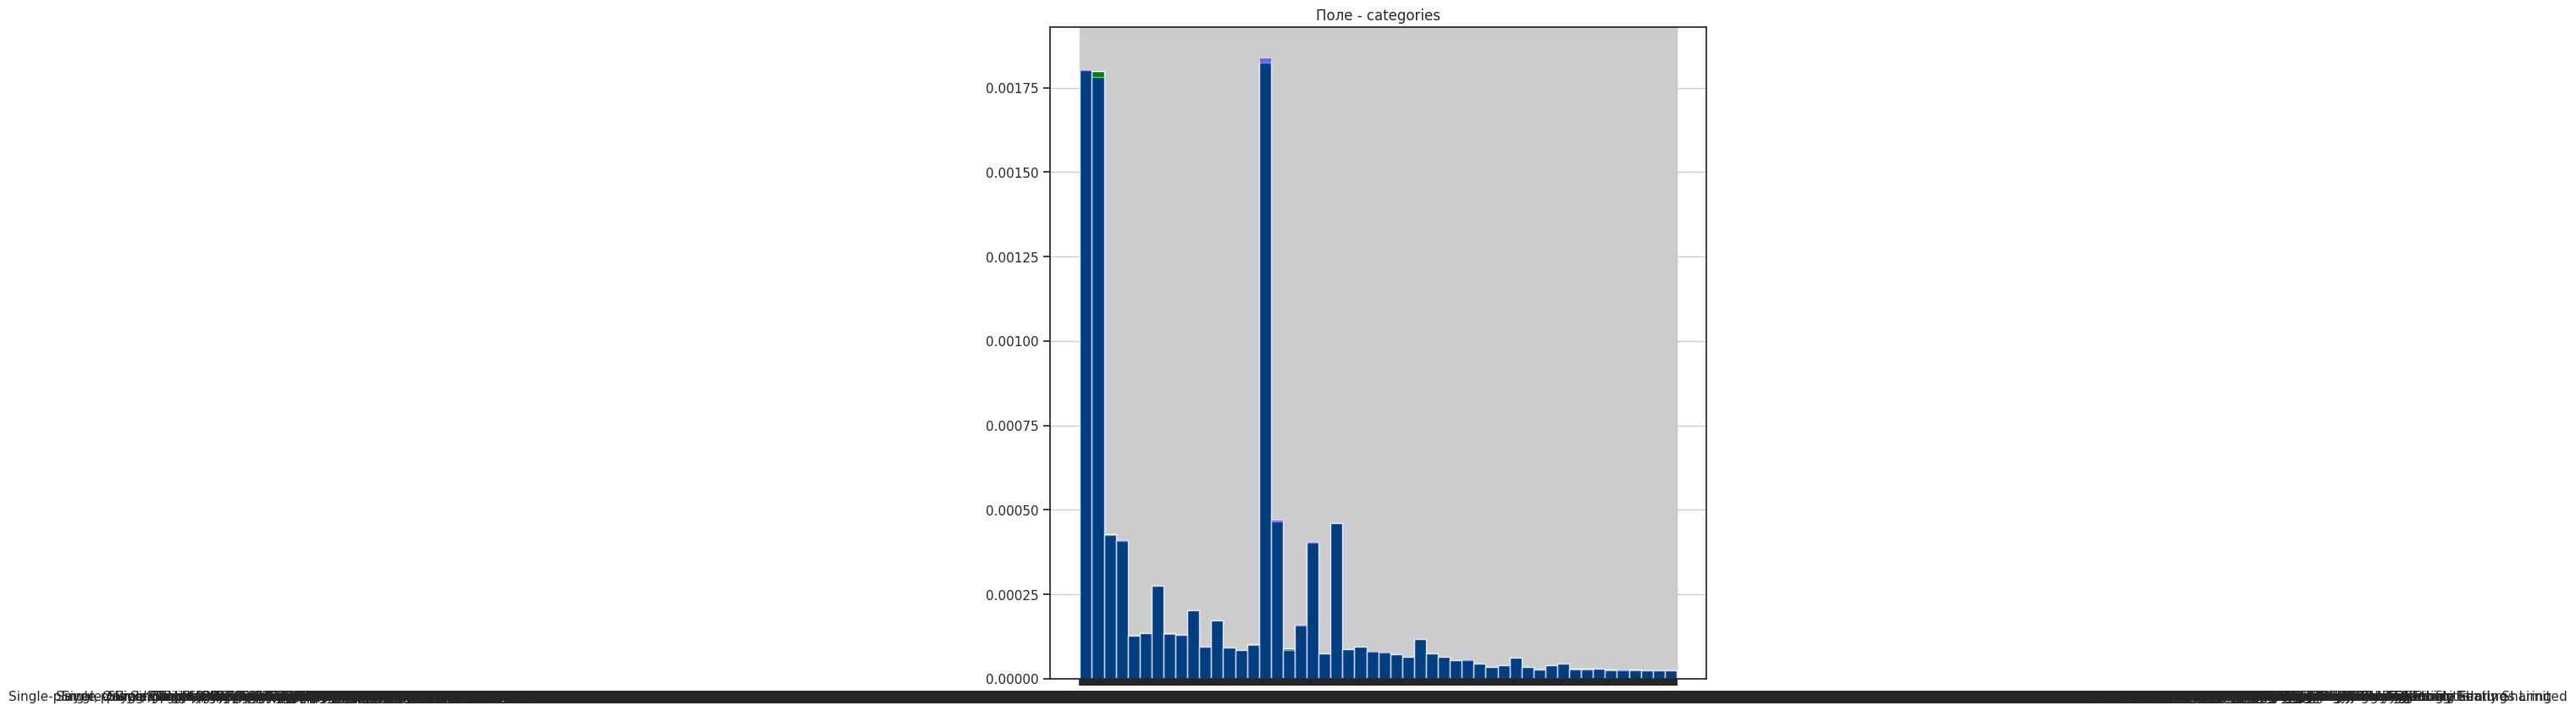

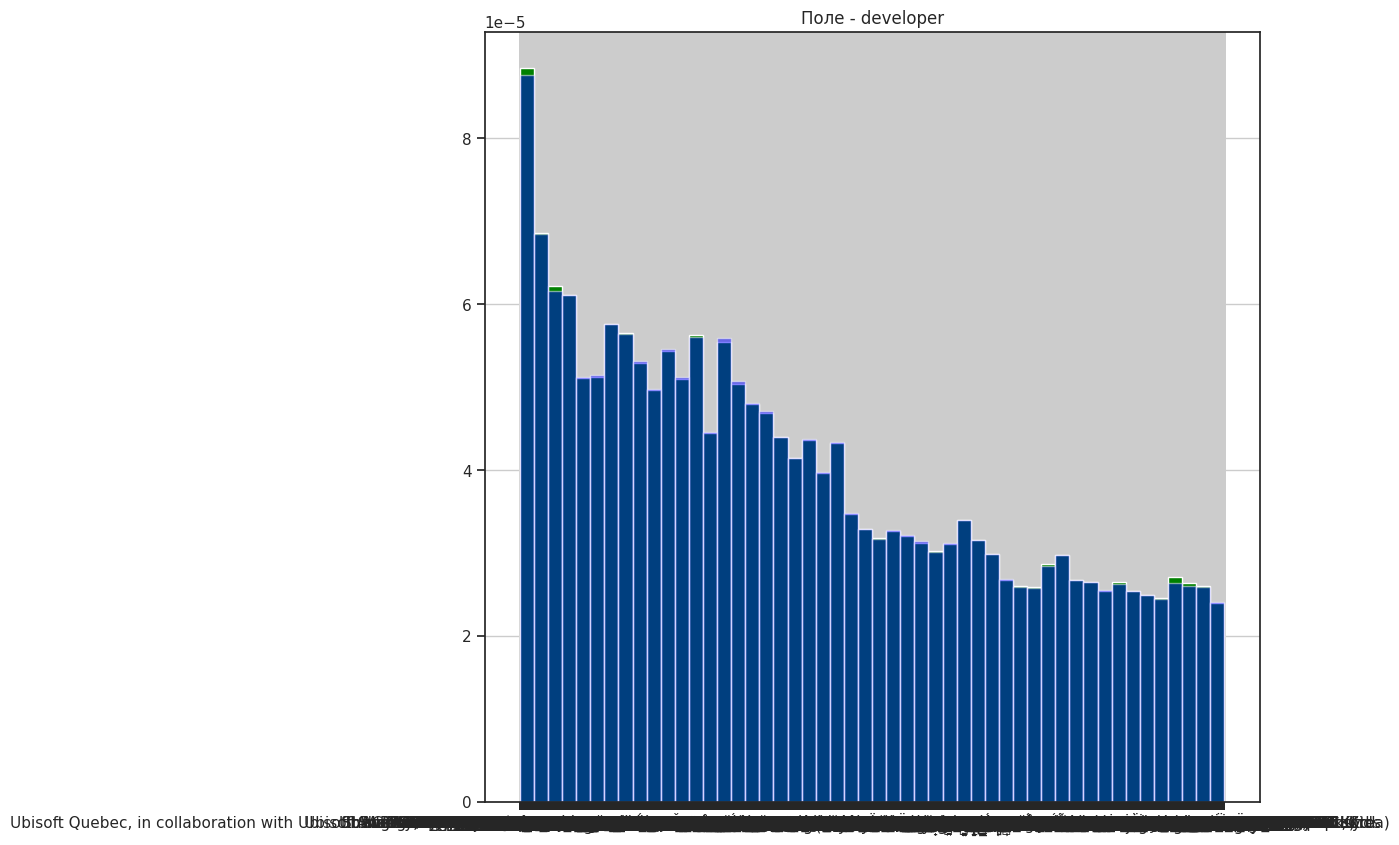

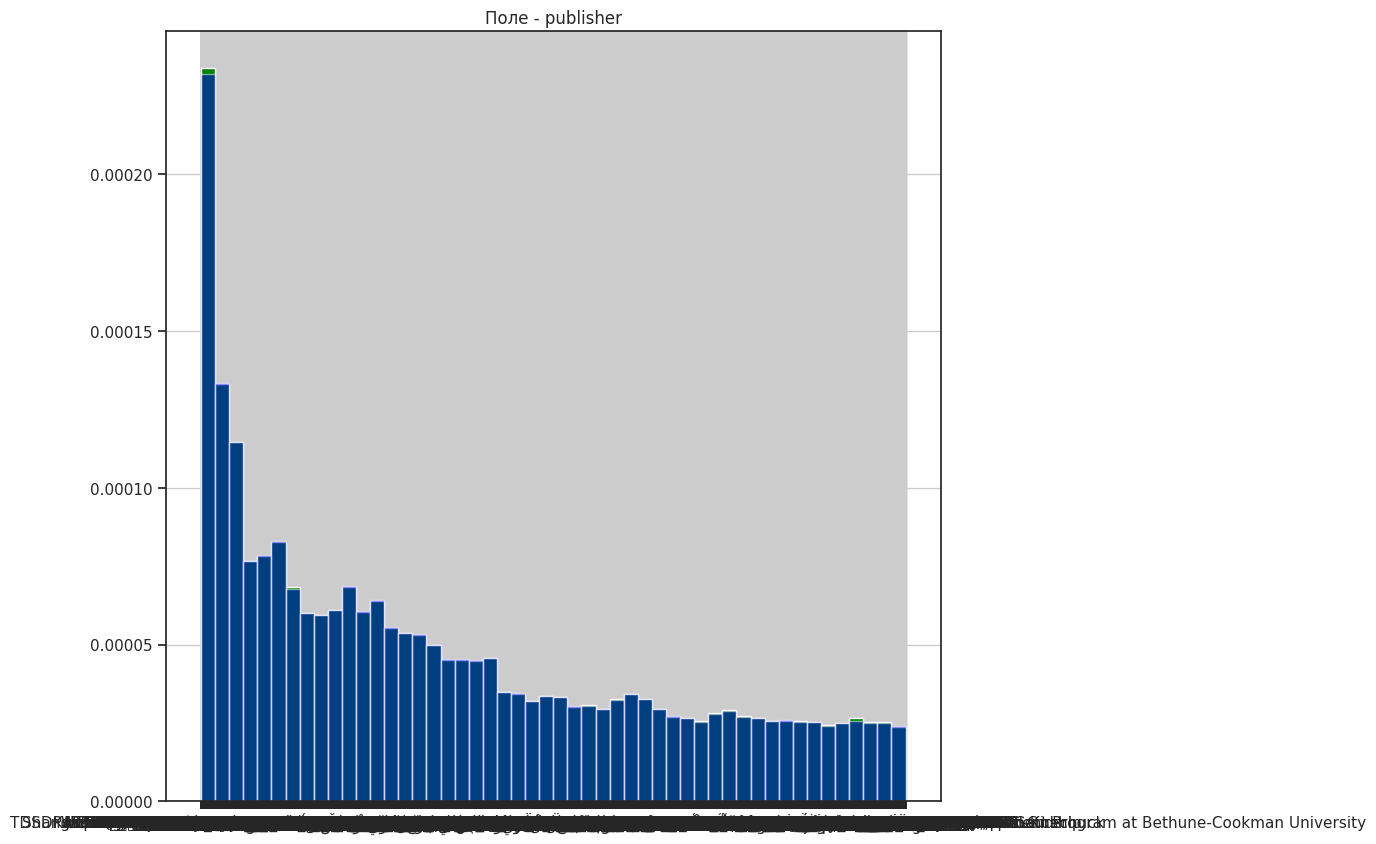

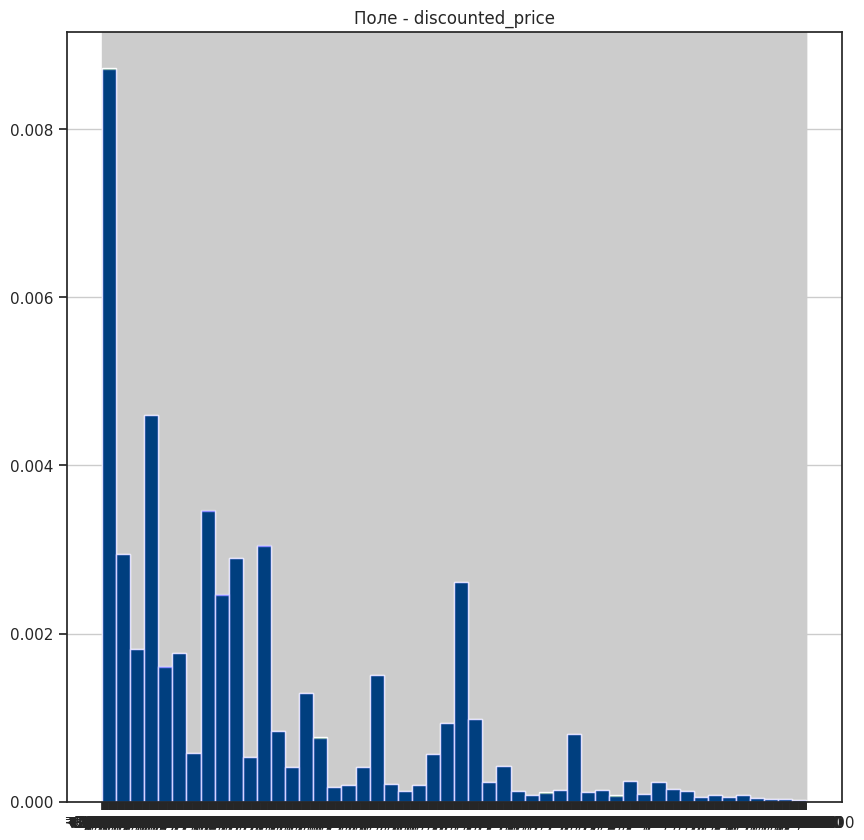

ValueError: 
Another story of Bloodlust, this time told through the eyes of Ravenblood; part Ghost... part Vampire... and 100% bada$$. His journey in search of lost strength and revenge will take you through the dark tombs and dungeons of the Vampirem.
                                                                                                                      ^
ParseException: Expected end of text, found '$'  (at char 118), (line:1, col:119)

<Figure size 1000x1000 with 1 Axes>

In [11]:
plot_hist_diff(data, data_drop_na, colsForDel)

In [12]:
data.dtypes

app_id                    int64
title                    object
release_date             object
genres                   object
categories               object
developer                object
publisher                object
original_price           object
discount_percentage      object
discounted_price         object
dlc_available             int64
age_rating                int64
content_descriptor       object
about_description        object
win_support                bool
mac_support                bool
linux_support              bool
awards                    int64
overall_review           object
overall_review_%        float64
overall_review_count    float64
recent_review            object
recent_review_%         float64
recent_review_count     float64
dtype: object

In [13]:
data = data.dropna(subset=colsForDel)
data.shape

(41975, 24)

In [14]:
data.isnull().sum()

app_id                      0
title                       0
release_date                0
genres                      0
categories                  0
developer                   0
publisher                   0
original_price          37144
discount_percentage     37144
discounted_price            0
dlc_available               0
age_rating                  0
content_descriptor      39634
about_description           0
win_support                 0
mac_support                 0
linux_support               0
awards                      0
overall_review           2340
overall_review_%         2340
overall_review_count     2340
recent_review           36510
recent_review_%         36510
recent_review_count     36510
dtype: int64

<Axes: xlabel='overall_review_%', ylabel='Density'>

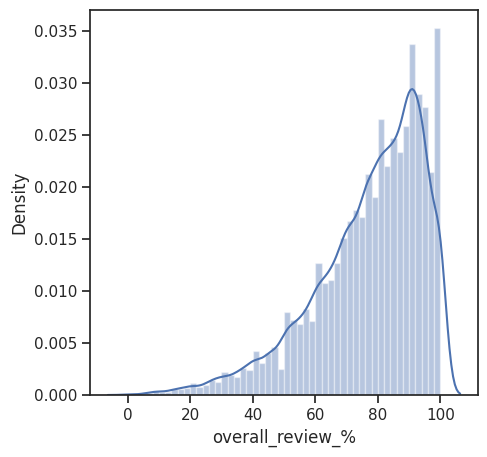

In [15]:
fig, ax = plt.subplots(figsize=(5,5))
sns.distplot(data['overall_review_%'])

Заполним overall_review_%

In [16]:
def impute_column(dataset, column, strategy_param, fill_value_param=None):
    """
    Заполнение пропусков в одном признаке
    """
    temp_data = dataset[[column]].values
    size = temp_data.shape[0]

    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)

    imputer = SimpleImputer(strategy=strategy_param,
                            fill_value=fill_value_param)
    all_data = imputer.fit_transform(temp_data)

    missed_data = temp_data[mask_missing_values_only]
    filled_data = all_data[mask_missing_values_only]

    return all_data.reshape((size,)), filled_data, missed_data

In [17]:
filled_data, _, _ = impute_column(data, 'overall_review_%', 'median')

<Axes: ylabel='Density'>

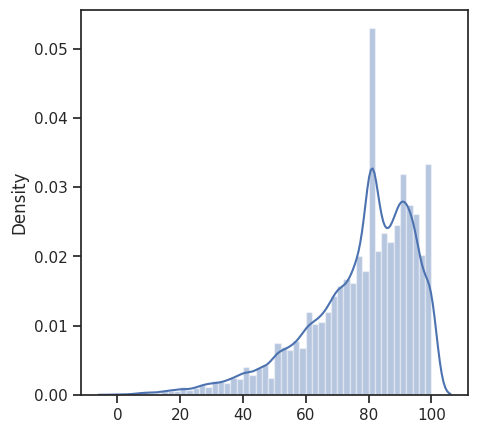

In [18]:
fig, ax = plt.subplots(figsize=(5,5))
sns.distplot(filled_data)

In [19]:
filled_data

array([87., 81., 89., ..., 81., 81., 81.])

In [20]:
knnimpute_hdata = data[['overall_review_%', 'overall_review_count']].copy()
knnimpute_hdata.head()
from sklearn.impute import KNNImputer
knnimputer = KNNImputer(
    n_neighbors=5,
    weights='distance',
    metric='nan_euclidean',
    add_indicator=False,
)
knnimpute_hdata_imputed_temp = knnimputer.fit_transform(knnimpute_hdata)
knnimpute_hdata_imputed = pd.DataFrame(knnimpute_hdata_imputed_temp, columns=knnimpute_hdata.columns)
knnimpute_hdata_imputed.head()

,overall_review_%,overall_review_count
0,87.0,8062218.0
1,81.0,2243112.0
2,89.0,12294.0
3,93.0,605191.0
4,80.0,594713.0


<Axes: xlabel='overall_review_%', ylabel='Density'>

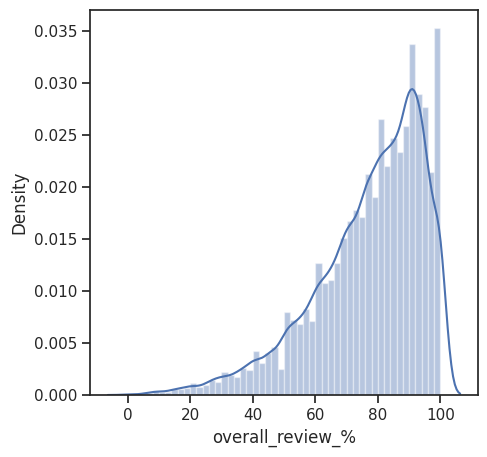

In [21]:
fig, ax = plt.subplots(figsize=(5,5))
sns.distplot(knnimpute_hdata['overall_review_%'])

С помощью импьютации сохранили форму распределения, не создав пиков.

## Кодирование категориальных признаков

In [22]:
data1 = pd.read_csv('steam-games.csv', sep=",")

In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [24]:
data1.head()

,app_id,title,release_date,genres,categories,developer,publisher,original_price,discount_percentage,discounted_price,...,win_support,mac_support,linux_support,awards,overall_review,overall_review_%,overall_review_count,recent_review,recent_review_%,recent_review_count
0,730,Counter-Strike 2,"21 Aug, 2012","Action, Free to Play","Cross-Platform Multiplayer, Steam Trading Card...",Valve,Valve,NaN,NaN,Free,...,True,False,True,1,Very Positive,87.0,8062218.0,Mostly Positive,79.0,57466.0
1,570,Dota 2,"9 Jul, 2013","Action, Strategy, Free to Play","Steam Trading Cards, Steam Workshop, SteamVR C...",Valve,Valve,NaN,NaN,Free,...,True,True,True,0,Very Positive,81.0,2243112.0,Mostly Positive,72.0,23395.0
2,2215430,Ghost of Tsushima DIRECTOR'S CUT,"16 May, 2024","Action, Adventure","Single-player, Online Co-op, Steam Achievement...",Sucker Punch Productions,PlayStation PC LLC,NaN,NaN,"₹3,999.00",...,True,False,False,0,Very Positive,89.0,12294.0,NaN,NaN,NaN
3,1245620,ELDEN RING,"24 Feb, 2022","Action, RPG","Single-player, Online PvP, Online Co-op, Steam...",FromSoftware Inc.,FromSoftware Inc.,NaN,NaN,"₹3,599.00",...,True,False,False,6,Very Positive,93.0,605191.0,Very Positive,94.0,7837.0
4,1085660,Destiny 2,"1 Oct, 2019","Action, Adventure, Free to Play","Single-player, Online PvP, Online Co-op, Steam...",Bungie,Bungie,NaN,NaN,Free,...,True,False,False,0,Very Positive,80.0,594713.0,Mostly Positive,73.0,4845.0


In [25]:
data1['overall_review'].unique()

array(['Very Positive', 'Overwhelmingly Positive', 'Mixed',
       'Mostly Positive', 'Mostly Negative', 'Overwhelmingly Negative',
       nan, 'Positive', 'Very Negative', 'Negative'], dtype=object)

In [26]:
cat_enc_le = le.fit_transform(data1['overall_review'])

In [27]:
np.unique(cat_enc_le)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [28]:
le.inverse_transform([0, 1, 2, 3])

array(['Mixed', 'Mostly Negative', 'Mostly Positive', 'Negative'],
      dtype=object)

In [29]:
pd.get_dummies(data1[['overall_review']]).head()

,overall_review_Mixed,overall_review_Mostly Negative,overall_review_Mostly Positive,overall_review_Negative,overall_review_Overwhelmingly Negative,overall_review_Overwhelmingly Positive,overall_review_Positive,overall_review_Very Negative,overall_review_Very Positive
0,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,True


# Нормализация числовых признаков

In [30]:
data2 = pd.read_csv('steam-games.csv', sep=",")
def diagnostic_plots(df, variable):
    plt.figure(figsize=(15,6))
    # гистограмма
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)
    ## Q-Q plot
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()

In [31]:
data2.dtypes

app_id                    int64
title                    object
release_date             object
genres                   object
categories               object
developer                object
publisher                object
original_price           object
discount_percentage      object
discounted_price         object
dlc_available             int64
age_rating                int64
content_descriptor       object
about_description        object
win_support                bool
mac_support                bool
linux_support              bool
awards                    int64
overall_review           object
overall_review_%        float64
overall_review_count    float64
recent_review            object
recent_review_%         float64
recent_review_count     float64
dtype: object

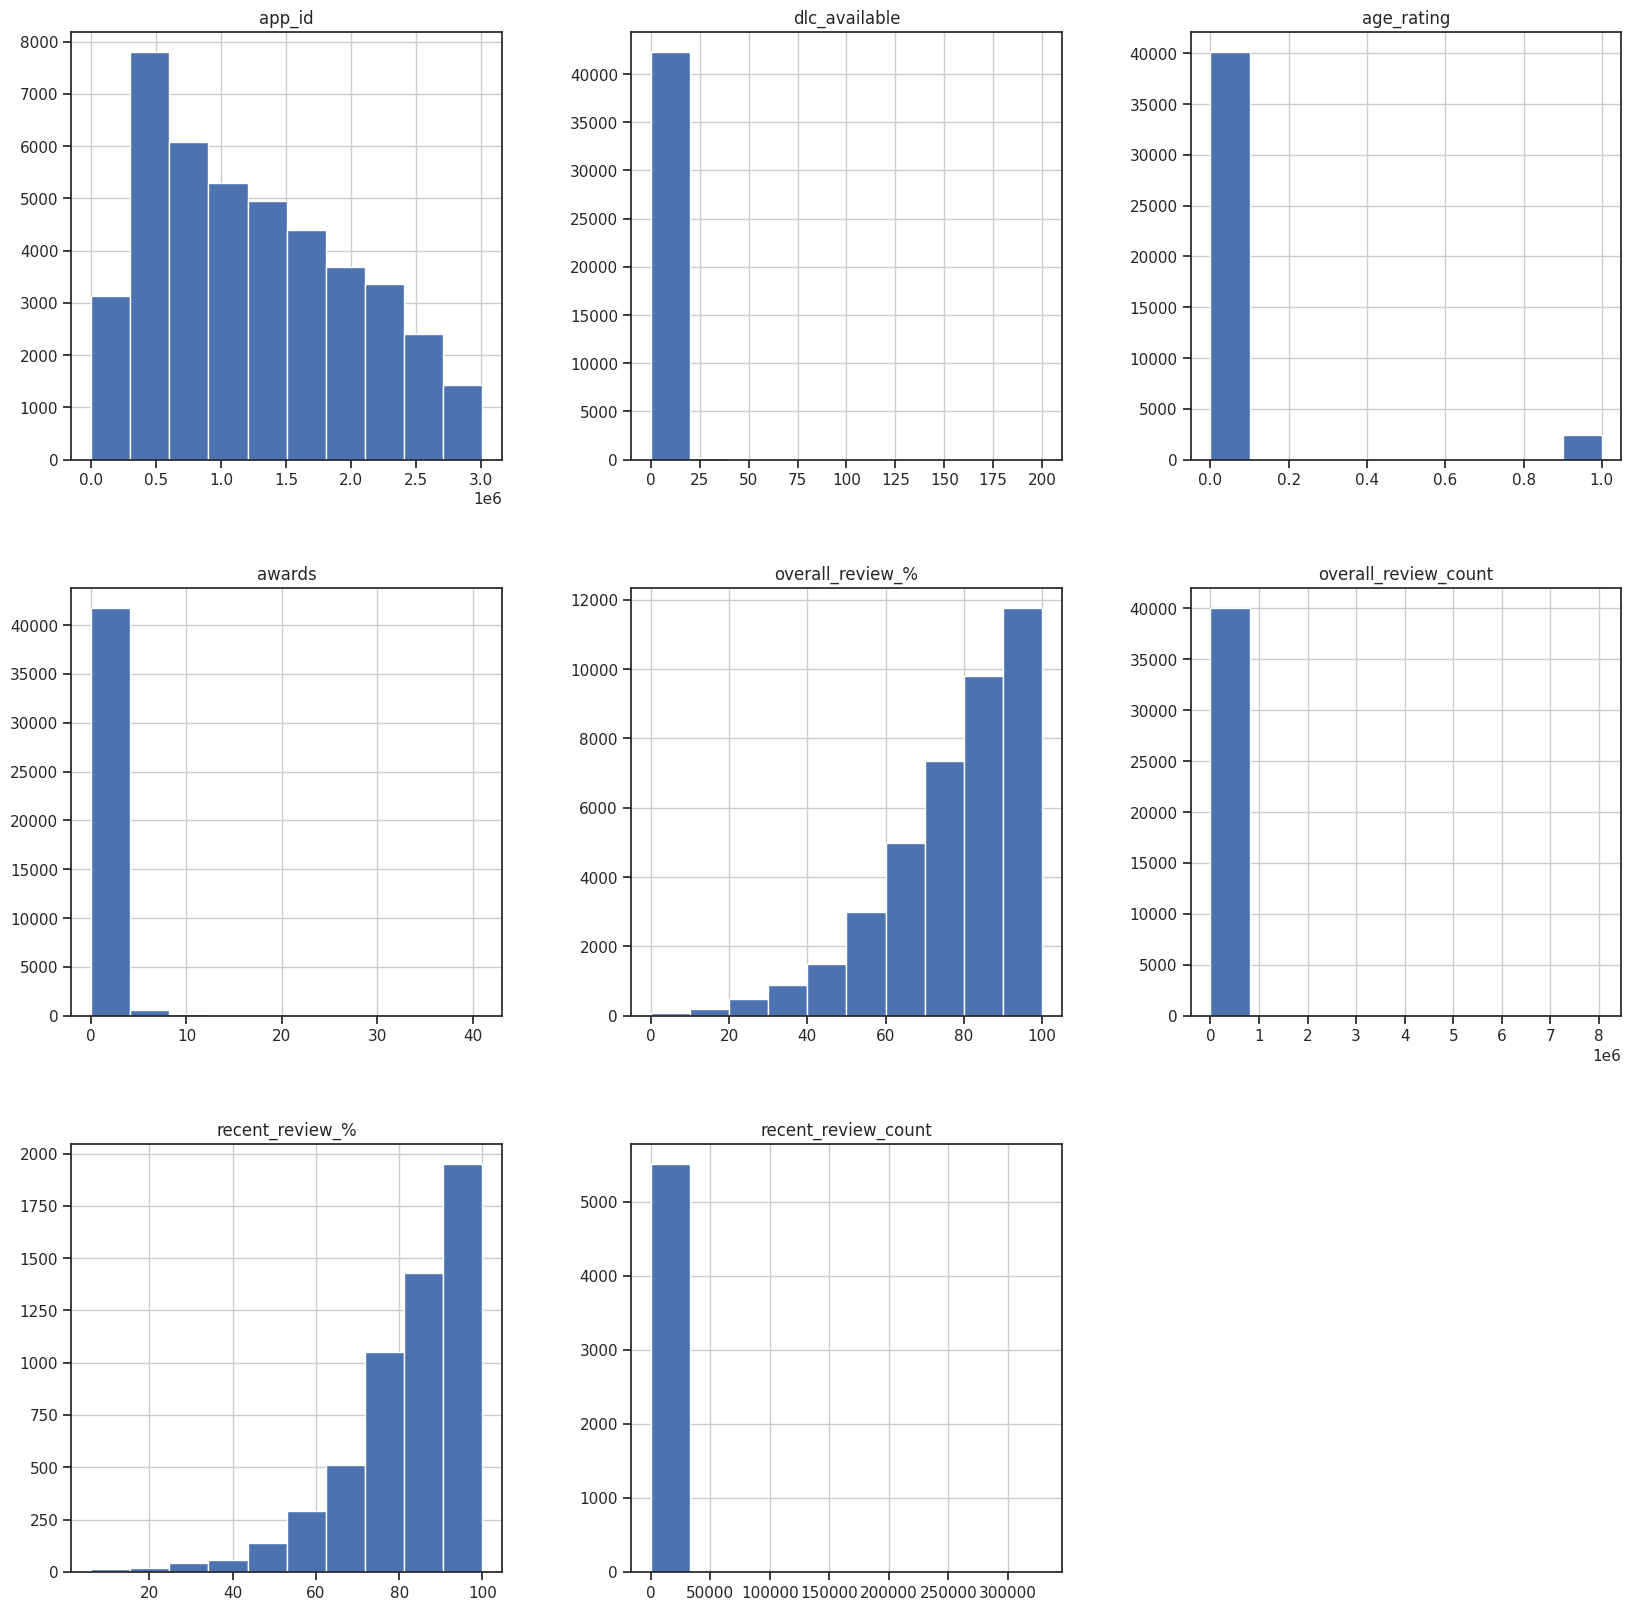

In [32]:
data2.hist(figsize=(20,20))
plt.show()

In [33]:
from sklearn.preprocessing import MinMaxScaler
# Обучаем StandardScaler на всей выборке и масштабируем
cs31 = MinMaxScaler()
data_cs31_scaled_temp = cs31.fit_transform(data2[['overall_review_count']])
# формируем DataFrame на основе массива
data_scaled =pd.DataFrame(data_cs31_scaled_temp, columns=['overall_review_count'])
data_scaled.describe()

,overall_review_count
count,40020.000000
mean,0.000309
std,0.006063
min,0.000000
25%,0.000001
50%,0.000006
75%,0.000034
max,1.000000


In [34]:
data_scaled.loc[data_scaled['overall_review_count']==0]

,overall_review_count
6185,0.0
7037,0.0
7210,0.0
7386,0.0
7613,0.0
...,...
40392,0.0
40415,0.0
40442,0.0
40833,0.0


In [35]:
data_scaled = data_scaled.loc[data_scaled['overall_review_count']!=0]

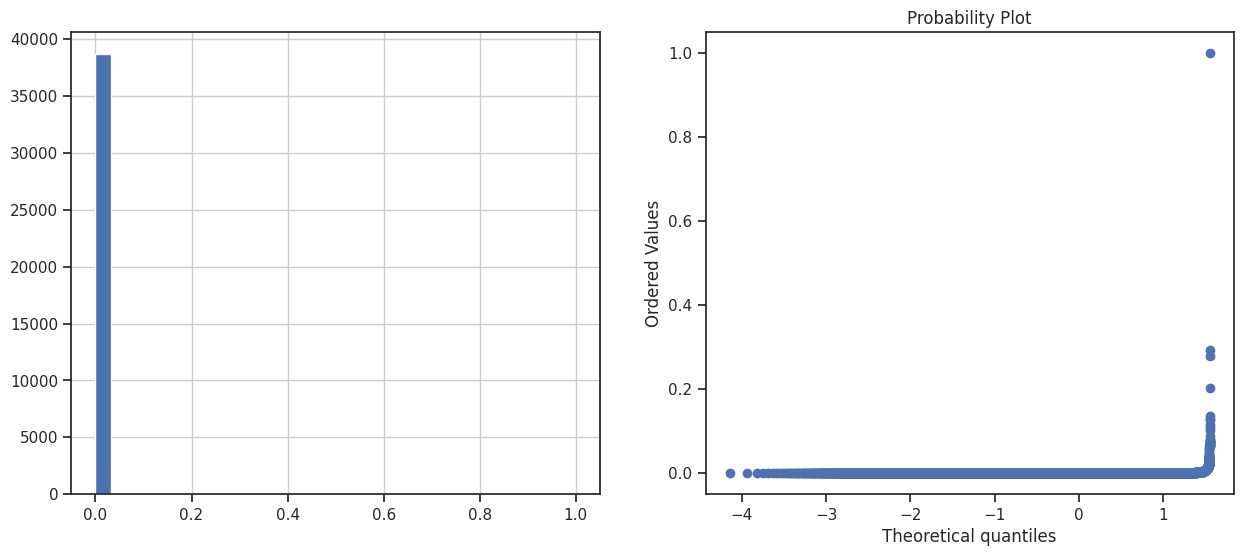

In [36]:
diagnostic_plots(data_scaled, 'overall_review_count')

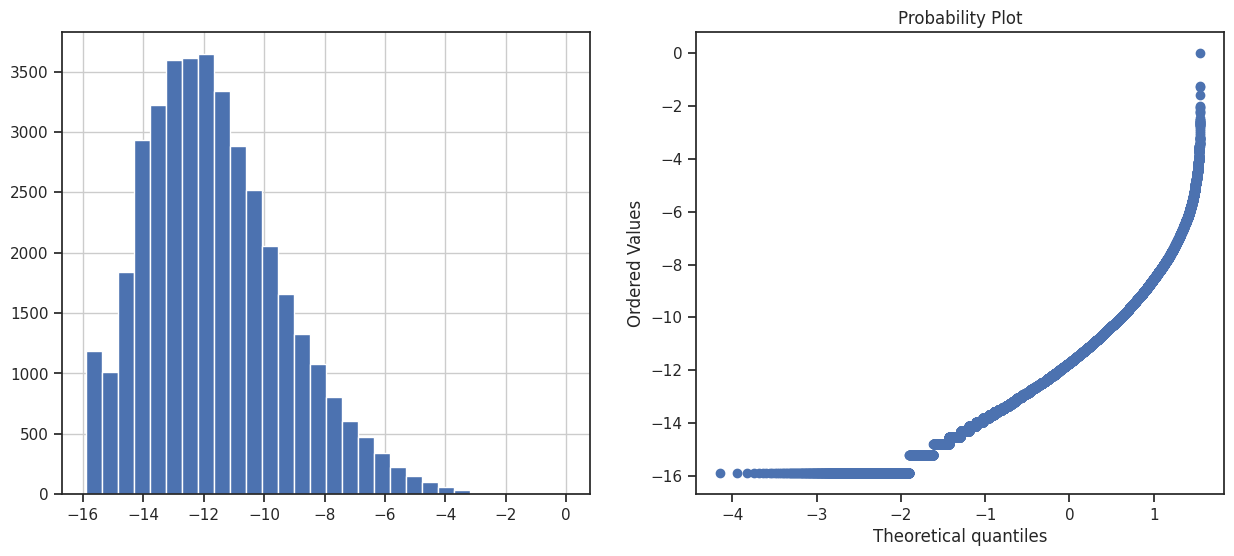

In [37]:
# логарифмическое
data_scaled['norm_log'] = np.log(data_scaled['overall_review_count'])
diagnostic_plots(data_scaled, 'norm_log')

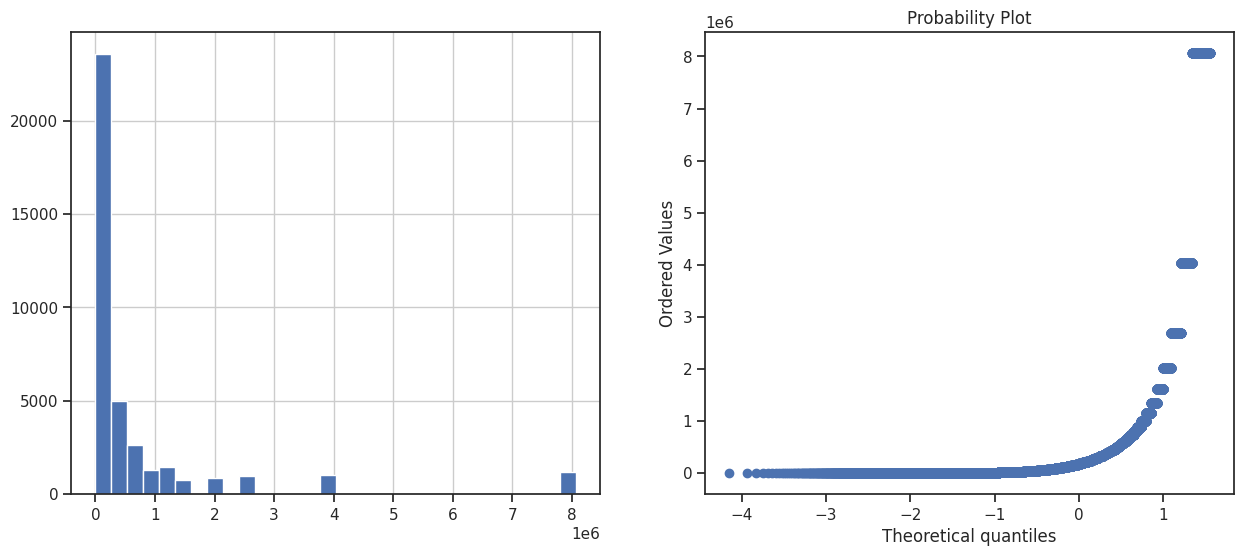

In [38]:
# обратное
data_scaled['norm_reciprocal'] = 1 / (data_scaled['overall_review_count'])
diagnostic_plots(data_scaled, 'norm_reciprocal')

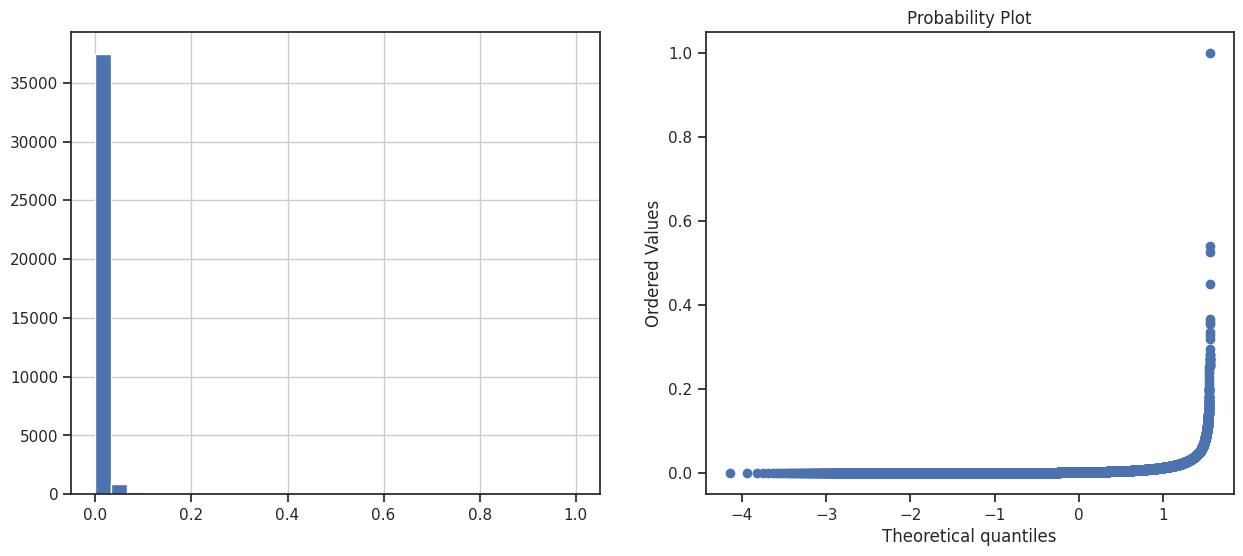

In [42]:
# root
data_scaled['norm_sqr'] = data_scaled['overall_review_count']**(1/2)
diagnostic_plots(data_scaled, 'norm_sqr')